<h2> Análise dos Gastos com Alimentação nas Escolas Municipais de São Paulo </h2>
A alimentação escolar é importante para o desenvolvimento de crianças e jovens em todo o mundo, pois além de motivar muitos alunos a frequentar a escola, ela também apoia os pais que não possuem condições financeiras de fornecer alimentação. <br><br>
O <b> objetivo </b> deste notebook é explorar dados do Portal de Transparência disponibilizados pelo Tribunal de Contas do Estado de São Paulo, com gastos em diversos aos municipios aos que Campinas é região imediata, para os anos de 2019, 2020, 2021 e 2022. E buscar entender se houve alguma modificação entre a pré pandemia, pandemia e pós pandemia em relação aos gastos e seus fornecedores.

In [1]:
from funcoes import *

In [2]:
df = pd.read_csv('/home/natasha/Documentos/Pessoal/analise-alimentacao-escolar/src/notebooks/df_full_campinas.csv').drop(['index'],axis=1)

In [3]:
df.head(2)

,id_despesa_detalhe,ano_exercicio,ds_municipio,ds_orgao,mes_referencia,mes_ref_extenso,tp_despesa,nr_empenho,identificador_despesa,ds_despesa,dt_emissao_despesa,vl_despesa,ds_funcao_governo,ds_subfuncao_governo,cd_programa,ds_programa,cd_acao,ds_acao,ds_fonte_recurso,ds_cd_aplicacao_fixo,ds_modalidade_lic,ds_elemento,historico_despesa
0,424887932,2019,PAULINIA,PREFEITURA MUNICIPAL DE PAULINIA,1,JANEIRO,EMPENHADO,000900-2019,IDENTIFICACAO ESPECIAL - SEM CPF/CNPJ - 000000...,SERVIDORES MUNICIPAIS DE PAULINIA,31/01/2019,6473,EDUCACAO,ALIMENTACAO E NUTRICAO,9,EDUCACAO TOTAL,2015,MANUTENCAO DA MERENDA ESCOLAR,TESOURO,0110 - GERAL,OUTROS/NAO APLICAVEL,31901145 - FERIAS - ABONO CONSTITUCIONAL,"FOLHA DE PAGAMENTO, REFERENTE A JANEIRO/2019. ..."
1,424888445,2019,PAULINIA,PREFEITURA MUNICIPAL DE PAULINIA,1,JANEIRO,EMPENHADO,001095-2019,CNPJ - PESSOA JURIDICA - 29979036000140,INSTITUTO NACIONAL DO SEGURO SOCIAL.,31/01/2019,1625,EDUCACAO,ALIMENTACAO E NUTRICAO,9,EDUCACAO TOTAL,2015,MANUTENCAO DA MERENDA ESCOLAR,TESOURO,0110 - GERAL,OUTROS/NAO APLICAVEL,31901302 - CONTRIBUICOES PREVIDENCIARIAS - INSS,"FOLHA DE PAGAMENTO, REFERENTE A JANEIRO/2019. ..."


O dataset para os anos respectivos e munícipios diretos a Campinas possui aproximadamente 60.636 registros.

In [4]:
df.shape

(60636, 23)

Arthur Nogueira e Campinas representam 30% de toda a base, será que em relação a gastos também? <br>
Com 17 municipios únicos, lembrando que Nova Odessa não houve nenhuma ocorrência para os filtros previamente feitos na etapa de tratamento de dados.

In [5]:
df.ds_municipio.value_counts(normalize=True)

ARTUR NOGUEIRA            0.168959
CAMPINAS                  0.133996
VINHEDO                   0.095405
AMERICANA                 0.077050
SANTA BARBARA D OESTE     0.072449
SANTO ANTONIO DE POSSE    0.071162
PEDREIRA                  0.070618
JAGUARIUNA                0.050564
HOLAMBRA                  0.050020
COSMOPOLIS                0.040141
MONTE MOR                 0.030394
VALINHOS                  0.030164
ELIAS FAUSTO              0.029784
PAULINIA                  0.028366
SUMARE                    0.021984
HORTOLANDIA               0.015832
INDAIATUBA                0.013111
Name: ds_municipio, dtype: float64

In [6]:
df.ds_municipio.nunique()

17

Podemos verificar que em 2020 é onde obtivemos menos registros relacionados a refeição, coincidentemente no ínicio da pandemia, informação a qual será melhor explorada adiante.

In [7]:
df.ano_exercicio.value_counts(normalize=True)

2022    0.373672
2019    0.283132
2021    0.215351
2020    0.127845
Name: ano_exercicio, dtype: float64

In [8]:
df.ds_subfuncao_governo.value_counts()

ALIMENTACAO E NUTRICAO    60636
Name: ds_subfuncao_governo, dtype: int64

In [9]:
df.ds_despesa.value_counts()

DISTRIBUIDORA NANCY LTDA                                 1987
MODOLOCAMPI AGRICOLA LTDA                                1517
NUTRIPLUS ALIMENTACAO E TECNOLOGIA LTDA                  1489
NUTRICIONALE COMERCIO DE ALIMENTOS LTDA                  1347
DALEFRUT COMERCIO DE PRODUTOS ALIMENTICIOS EIRELI EPP    1204
                                                         ... 
PREDILECTA ALIMENTOS LTDA                                   1
MATEUS VILANOVA TELLE 36276307858                           1
D  P  QUARTAROLO GERENCIAMENTO DE FROTAS EIRELI             1
INOVAR COMERCIO ONLINE DE METAIS E FERRAGENS EIREL          1
ANGELICA VIVIANE SIMPLICIO LOPEZ                            1
Name: ds_despesa, Length: 825, dtype: int64

In [10]:
df.ds_acao.value_counts()

MANUTENCAO DA MERENDA ESCOLAR                                         10919
MANUTENCAO DAS ATIVIDADES                                              9008
MANUTENCAO DOS SERVICOS                                                8092
PROMOVER E GARANTIR MERENDA ESCOLAR A TODAS AS UNIDADES ESCOLARES      4990
MANUTENCAO DA ASSISTENCIA AO EDUCANDO                                  4646
PROGRAMA MERENDA ESCOLAR                                               4239
ALIMENTACAO ESCOLAR                                                    3411
GESTAO DO PROGRAMA DE ALIMENTACAO ESCOLAR                              3066
*** NAO CONSTA NO CADASTRO ***                                         2712
DISTRIBUICAO DE MERENDA ESCOLAR NA REDE PUBLICA                        1843
MANUTENCAO DAS ATIVIDADES - MERENDA - TESOURO                          1237
GESTAO DE SERVICOS EDUCACIONAIS                                         976
FORNECIMENTO DE ALIMENTACAO ESCOLAR                                     795
MANUTENCAO D

<h3> Valor Gasto por Ano </h3>
Houve um pequeno aumento do valor total com gastos relacionados a alimentação, entre 2019 e 2021, o gasto foi em média 900 bilhões, já em 2022 foi o ano em que houve mais gastos no total com 1.345.905.471 (trilhão). Será que abertura de escolas ou mudanças nos cardápios, estrutura da alimentação? (pesquisar)

In [11]:
df.groupby('ano_exercicio').agg({'vl_despesa': ['mean', 'median', 'sum', 'max', 'min']}).apply(lambda s: s.apply('{0:.2f}'.format)).reset_index()

ano_exercicio vl_despesa                                                  
                      mean   median            sum          max          min
0          2019   48109.89  4567.50   825950652.00  19250000.00  -1307361.00
1          2020  124545.85  7669.00   965479448.00  25500000.00  -7255097.00
2          2021   67954.47  3969.00   887349405.00  28000000.00    -56001.00
3          2022   59400.89  5492.50  1345905471.00  20000000.00   -141388.00

<function matplotlib.pyplot.show(close=None, block=None)>

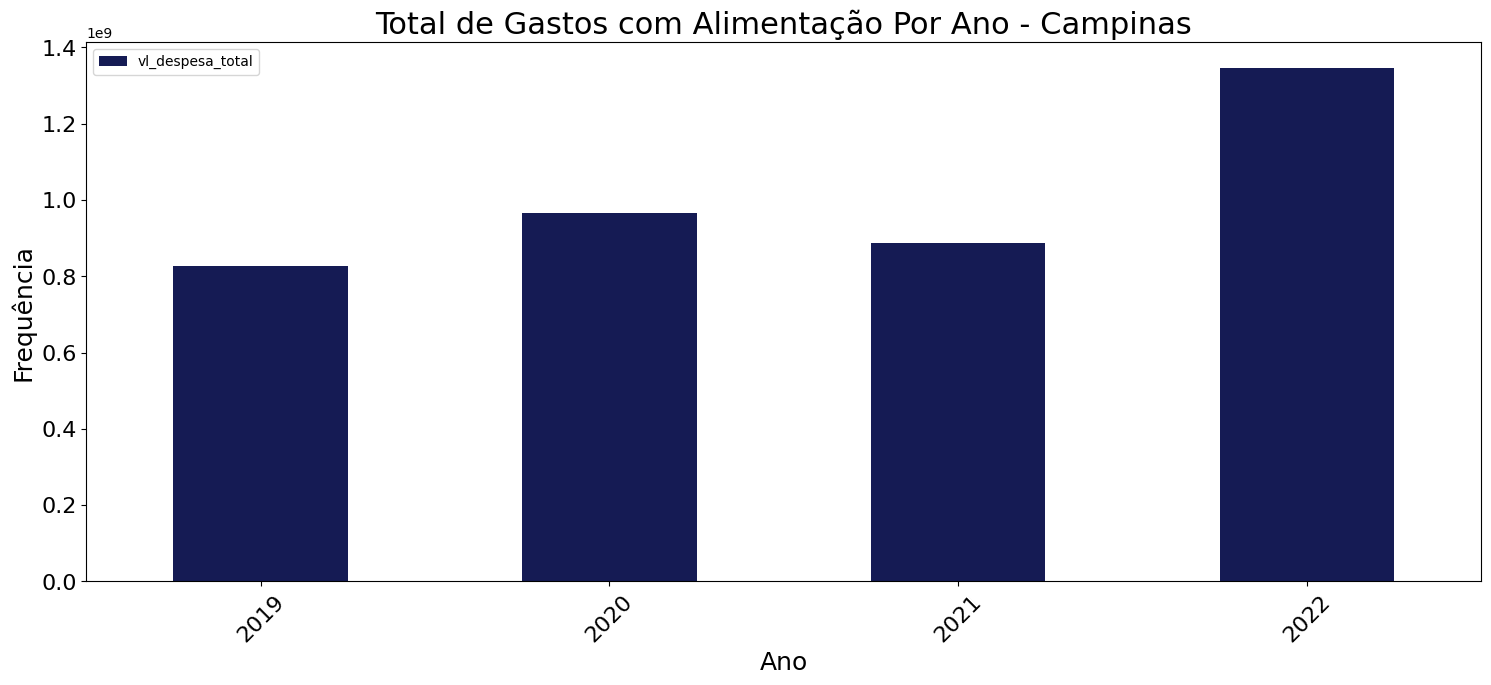

In [12]:
df_soma = df.groupby('ano_exercicio').agg({'vl_despesa': 'sum'}).apply(lambda s: s.apply('{0:.2f}'.format)).reset_index()
df_soma.rename(columns={'vl_despesa': 'vl_despesa_total'}, inplace = True)
df_soma['vl_despesa_total'] = df_soma['vl_despesa_total'].astype(float)

plot_bar(df_soma, 'ano_exercicio', 'vl_despesa_total', 'Total de Gastos com Alimentação Por Ano - Campinas', 'Ano')

<h3> Quantidade de Transações por Ano </h3>

2020 foi o ano com menos transações únicas de despesas feitas relacionadas a alimentação escolar, com aproximadamente -54% de despesas referente ao ano de 2019, o que é curioso, pois os gastos totais obtiveram um leve crescimento. Em 2021 esse valor quase dobrou, lembrando que ainda estávamos em cenário pandêmico. <br>
Todas as transações possuem id de identificação único.

<function matplotlib.pyplot.show(close=None, block=None)>

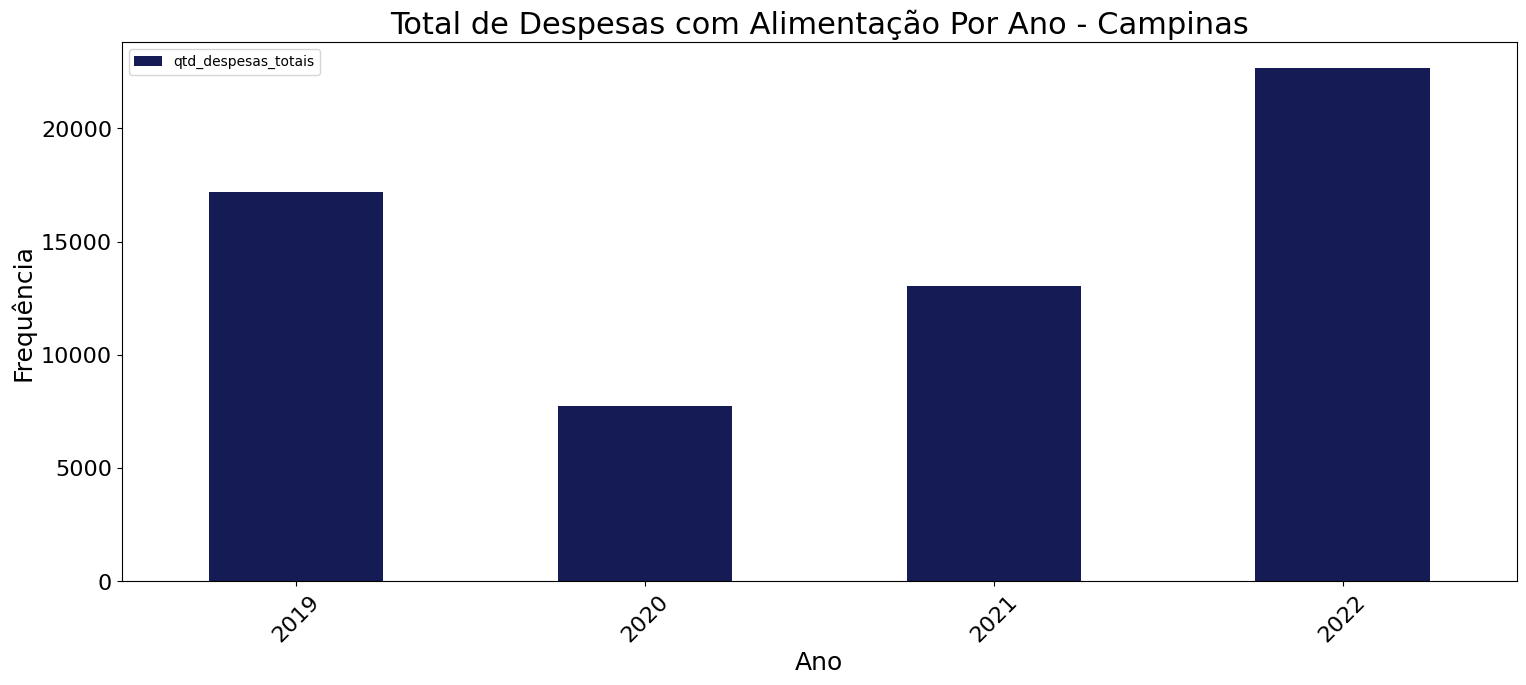

In [26]:
df_transacao = df.groupby('ano_exercicio').agg({'id_despesa_detalhe': 'count'}).apply(lambda s: s.apply('{0:.2f}'.format)).reset_index()
df_transacao.rename(columns={'id_despesa_detalhe': 'qtd_despesas_totais'}, inplace = True)
df_transacao['qtd_despesas_totais'] = df_transacao['qtd_despesas_totais'].astype(float)

plot_bar(df_transacao, 'ano_exercicio', 'qtd_despesas_totais', 'Total de Despesas com Alimentação Por Ano - Campinas', 'Ano')

In [15]:
df.id_despesa_detalhe.nunique()

60636

In [16]:
df.shape

(60636, 23)

<h3> Perguntas </h3>
- Faz sentido mantermos todos as ações `(ds_acao)` no estudo? Como manutenção da unidade, manutenção das despesas administrativas? <br>
- Por que no valor mínimo de despesas temos valores negativos? Talvez alguma restituição de valores?